## Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


## Data Loading

In [ ]:
df=pd.read_csv('E:\\Data analysis\\pandas\\Titanic Project\\titanic.csv')


## Understanding the Data

In [ ]:
df.head()


,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,survived
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,1
1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,1
2,1,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,0
3,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,0
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,0


In [ ]:
df.tail()


,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,survived
1304,3,"Zabour, Miss. Hileni",female,14.5,1,0,2665,14.4542,NaN,C,0
1305,3,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,0
1306,3,"Zakarian, Mr. Mapriededer",male,26.5,0,0,2656,7.2250,NaN,C,0
1307,3,"Zakarian, Mr. Ortin",male,27.0,0,0,2670,7.2250,NaN,C,0
1308,3,"Zimmerman, Mr. Leo",male,29.0,0,0,315082,7.8750,NaN,S,0


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1309 non-null   int64  
 1   name      1309 non-null   object 
 2   sex       1309 non-null   object 
 3   age       1046 non-null   float64
 4   sibsp     1309 non-null   int64  
 5   parch     1309 non-null   int64  
 6   ticket    1309 non-null   object 
 7   fare      1308 non-null   float64
 8   cabin     295 non-null    object 
 9   embarked  1307 non-null   object 
 10  survived  1309 non-null   int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 112.6+ KB


## Data Cleaning

In [ ]:
df.duplicated().any()


False

In [ ]:
df.isnull().sum()


pclass         0
name           0
sex            0
age          263
sibsp          0
parch          0
ticket         0
fare           1
cabin       1014
embarked       2
survived       0
dtype: int64

In [ ]:
df['embarked']=df['embarked'].fillna(df['embarked'].mode()[0])


# Data Visualization

<Axes: xlabel='fare'>

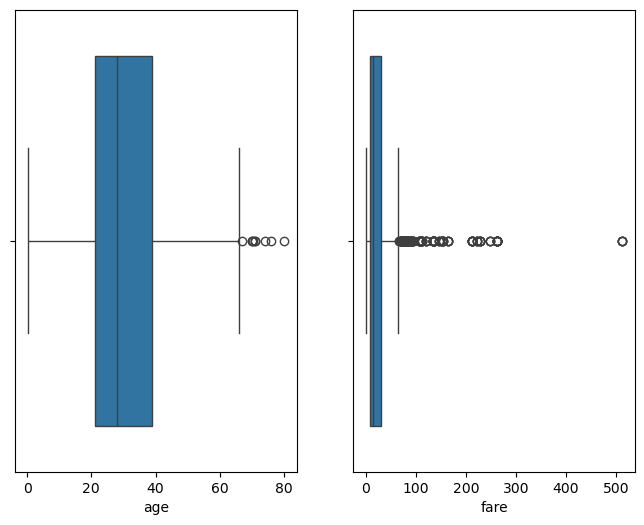

In [ ]:
fig,axes=plt.subplots(1,2,figsize=(8,6))
sns.boxplot(df,x='age',ax=axes[0])
sns.boxplot(df,x='fare',ax=axes[1])


In [149]:
df['age']=df['age'].fillna(df['age'].median())
df['fare']=df['fare'].fillna(df['fare'].median())


In [ ]:
df=df.drop(columns=['cabin'])


In [151]:
for col in ['age','fare']:
    df[col]=df[col].round(2)


In [ ]:
df['family_cnt']=df['sibsp']+df['parch']
df=df.drop(columns=['sibsp','parch'])


In [ ]:
df.loc[:2,'name']


0     Allen, Miss. Elisabeth Walton
1    Allison, Master. Hudson Trevor
2      Allison, Miss. Helen Loraine
Name: name, dtype: object

In [ ]:

df['lname']=df['name'].str.split(',',expand=True)[0]


In [ ]:
temp=df['name'].str.split(',',expand=True)[1]
df[['title','fname']]=temp.str.split('.',n=1,expand=True)


In [ ]:
df[['title','fname']]


,title,fname
0,Miss,Elisabeth Walton
1,Master,Hudson Trevor
2,Miss,Helen Loraine
3,Mr,Hudson Joshua Creighton
4,Mrs,Hudson J C (Bessie Waldo Daniels)
...,...,...
1304,Miss,Hileni
1305,Miss,Thamine
1306,Mr,Mapriededer
1307,Mr,Ortin


In [ ]:
df.columns


Index(['pclass', 'name', 'sex', 'age', 'ticket', 'fare', 'embarked',
       'survived', 'family_cnt', 'lname', 'title', 'fname'],
      dtype='object')

In [ ]:
df=df.drop(columns=['name'])


In [ ]:
df.head()


,pclass,sex,age,ticket,fare,embarked,survived,family_cnt,lname,title,fname
0,1,female,29.00,24160,211.34,S,1,0,Allen,Miss,Elisabeth Walton
1,1,male,0.92,113781,151.55,S,1,3,Allison,Master,Hudson Trevor
2,1,female,2.00,113781,151.55,S,0,3,Allison,Miss,Helen Loraine
3,1,male,30.00,113781,151.55,S,0,3,Allison,Mr,Hudson Joshua Creighton
4,1,female,25.00,113781,151.55,S,0,3,Allison,Mrs,Hudson J C (Bessie Waldo Daniels)


In [ ]:
df=df.rename(columns={'sex':'gender'})


In [ ]:
df.head()


,pclass,gender,age,ticket,fare,embarked,survived,family_cnt,lname,title,fname
0,1,female,29.00,24160,211.34,S,1,0,Allen,Miss,Elisabeth Walton
1,1,male,0.92,113781,151.55,S,1,3,Allison,Master,Hudson Trevor
2,1,female,2.00,113781,151.55,S,0,3,Allison,Miss,Helen Loraine
3,1,male,30.00,113781,151.55,S,0,3,Allison,Mr,Hudson Joshua Creighton
4,1,female,25.00,113781,151.55,S,0,3,Allison,Mrs,Hudson J C (Bessie Waldo Daniels)


In [ ]:
df['embarked'].unique()


array(['S', 'C', 'Q'], dtype=object)

In [ ]:
df['embarked']=df['embarked'].map({'S':'Southampton','C':'Cherbourg','Q':'Queenstown'})


In [ ]:
df.head()


,pclass,gender,age,ticket,fare,embarked,survived,family_cnt,lname,title,fname
0,1,female,29.00,24160,211.34,Southampton,1,0,Allen,Miss,Elisabeth Walton
1,1,male,0.92,113781,151.55,Southampton,1,3,Allison,Master,Hudson Trevor
2,1,female,2.00,113781,151.55,Southampton,0,3,Allison,Miss,Helen Loraine
3,1,male,30.00,113781,151.55,Southampton,0,3,Allison,Mr,Hudson Joshua Creighton
4,1,female,25.00,113781,151.55,Southampton,0,3,Allison,Mrs,Hudson J C (Bessie Waldo Daniels)


In [ ]:
g=df['ticket'].value_counts()
solo=g[g==1].index
def fun(df):
    if df['family_cnt']>0:
        return 'family'
    elif df['ticket'] in solo:
        return 'solo'
    else:
        return 'friends'


In [ ]:
df['companion_type']=df.apply(fun,axis=1)


In [167]:
def age_category(age):
    if age < 18.00:
        return 'Child'
    elif age <= 60.00:
        return 'Adult'
    else:
        return 'Senior'

df['age_category'] = df['age'].apply(age_category)


In [ ]:
df.head()


,pclass,gender,age,ticket,fare,embarked,survived,family_cnt,lname,title,fname,companion_type,age_category
0,1,female,29.00,24160,211.34,Southampton,1,0,Allen,Miss,Elisabeth Walton,friends,Adult
1,1,male,0.92,113781,151.55,Southampton,1,3,Allison,Master,Hudson Trevor,family,Child
2,1,female,2.00,113781,151.55,Southampton,0,3,Allison,Miss,Helen Loraine,family,Child
3,1,male,30.00,113781,151.55,Southampton,0,3,Allison,Mr,Hudson Joshua Creighton,family,Adult
4,1,female,25.00,113781,151.55,Southampton,0,3,Allison,Mrs,Hudson J C (Bessie Waldo Daniels),family,Adult


In [ ]:
df.head()


,pclass,gender,age,ticket,fare,embarked,survived,family_cnt,lname,title,fname,companion_type,age_category
0,1,female,29.00,24160,211.34,Southampton,1,0,Allen,Miss,Elisabeth Walton,friends,Adult
1,1,male,0.92,113781,151.55,Southampton,1,3,Allison,Master,Hudson Trevor,family,Child
2,1,female,2.00,113781,151.55,Southampton,0,3,Allison,Miss,Helen Loraine,family,Child
3,1,male,30.00,113781,151.55,Southampton,0,3,Allison,Mr,Hudson Joshua Creighton,family,Adult
4,1,female,25.00,113781,151.55,Southampton,0,3,Allison,Mrs,Hudson J C (Bessie Waldo Daniels),family,Adult


In [ ]:
lst=['ticket','title','fname','lname','gender','age','age_category','family_cnt','companion_type','pclass','embarked','fare','survived']


In [ ]:
df=df[lst]


In [ ]:
df.head()


,ticket,title,fname,lname,gender,age,age_category,family_cnt,companion_type,pclass,embarked,fare,survived
0,24160,Miss,Elisabeth Walton,Allen,female,29.00,Adult,0,friends,1,Southampton,211.34,1
1,113781,Master,Hudson Trevor,Allison,male,0.92,Child,3,family,1,Southampton,151.55,1
2,113781,Miss,Helen Loraine,Allison,female,2.00,Child,3,family,1,Southampton,151.55,0
3,113781,Mr,Hudson Joshua Creighton,Allison,male,30.00,Adult,3,family,1,Southampton,151.55,0
4,113781,Mrs,Hudson J C (Bessie Waldo Daniels),Allison,female,25.00,Adult,3,family,1,Southampton,151.55,0


In [ ]:
df=df.sort_values(by='ticket',ascending=True)


In [ ]:
df.head()


,ticket,title,fname,lname,gender,age,age_category,family_cnt,companion_type,pclass,embarked,fare,survived
67,110152,Miss,Gladys,Cherry,female,30.0,Adult,0,friends,1,Southampton,86.50,1
245,110152,the Countess,of (Lucy Noel Martha Dyer-Edwards),Rothes,female,33.0,Adult,0,friends,1,Southampton,86.50,1
195,110152,Miss,Roberta,Maioni,female,16.0,Child,0,friends,1,Southampton,86.50,1
289,110413,Miss,Ruth,Taussig,female,18.0,Adult,2,family,1,Southampton,79.65,1
291,110413,Mrs,Emil (Tillie Mandelbaum),Taussig,female,39.0,Adult,2,family,1,Southampton,79.65,1


In [ ]:
for i in ['title','fname','lname']:
    df[i]=df[i].str.strip()


In [ ]:
for i in ['ticket']:
    df[i]=df[i].str.strip()


In [ ]:
df['gender']=df['gender'].str.title()


In [ ]:
df.head()


,ticket,title,fname,lname,gender,age,age_category,family_cnt,companion_type,pclass,embarked,fare,survived
67,110152,Miss,Gladys,Cherry,Female,30.0,Adult,0,friends,1,Southampton,86.50,1
245,110152,the Countess,of (Lucy Noel Martha Dyer-Edwards),Rothes,Female,33.0,Adult,0,friends,1,Southampton,86.50,1
195,110152,Miss,Roberta,Maioni,Female,16.0,Child,0,friends,1,Southampton,86.50,1
289,110413,Miss,Ruth,Taussig,Female,18.0,Adult,2,family,1,Southampton,79.65,1
291,110413,Mrs,Emil (Tillie Mandelbaum),Taussig,Female,39.0,Adult,2,family,1,Southampton,79.65,1


# level-1

1. get the unique values for (gender,pclass,age_category,companion_type,embarked)
   

In [ ]:
unique_values={
    'gender':df['gender'].unique().tolist(),
    'pclass':df['pclass'].unique().tolist(),
    'age_category': df['age_category'].unique().tolist(),
    'companion_type': df['companion_type'].unique().tolist(),
    'embarked': df['embarked'].unique().tolist()
}


In [ ]:
unique_values


{'gender': ['Female', 'Male'],
 'pclass': [1, 2, 3],
 'age_category': ['Adult', 'Child', 'Senior'],
 'companion_type': ['friends', 'family', 'solo'],
 'embarked': ['Southampton', 'Cherbourg', 'Queenstown']}

2. (i)  get the passenger 'Emil' details
   (ii) get the passenger 'Emil' gender,age,companion_type,survival_status

In [ ]:
df.query("fname=='Emil'")


,ticket,title,fname,lname,gender,age,age_category,family_cnt,companion_type,pclass,embarked,fare,survived
290,110413,Mr,Emil,Taussig,Male,52.0,Adult,2,family,1,Southampton,79.65,0
715,343276,Mr,Emil,Christmann,Male,29.0,Adult,0,solo,3,Southampton,8.05,0
39,PC 17591,Mr,Emil,Brandeis,Male,48.0,Adult,0,solo,1,Cherbourg,50.50,0


3. get the 'Emil' family members

In [ ]:
a=df.query("fname=='Emil' and companion_type=='family'")['ticket']
a


290    110413
Name: ticket, dtype: object

In [ ]:
df.query("ticket in @a")


,ticket,title,fname,lname,gender,age,age_category,family_cnt,companion_type,pclass,embarked,fare,survived
289,110413,Miss,Ruth,Taussig,Female,18.0,Adult,2,family,1,Southampton,79.65,1
291,110413,Mrs,Emil (Tillie Mandelbaum),Taussig,Female,39.0,Adult,2,family,1,Southampton,79.65,1
290,110413,Mr,Emil,Taussig,Male,52.0,Adult,2,family,1,Southampton,79.65,0


In [184]:
df.loc[df['ticket']==110413]


,ticket,title,fname,lname,gender,age,age_category,family_cnt,companion_type,pclass,embarked,fare,survived


4. get the passenger details who got survived

In [ ]:
df.query("survived==1")


,ticket,title,fname,lname,gender,age,age_category,family_cnt,companion_type,pclass,embarked,fare,survived
67,110152,Miss,Gladys,Cherry,Female,30.0,Adult,0,friends,1,Southampton,86.50,1
245,110152,the Countess,of (Lucy Noel Martha Dyer-Edwards),Rothes,Female,33.0,Adult,0,friends,1,Southampton,86.50,1
195,110152,Miss,Roberta,Maioni,Female,16.0,Child,0,friends,1,Southampton,86.50,1
289,110413,Miss,Ruth,Taussig,Female,18.0,Adult,2,family,1,Southampton,79.65,1
291,110413,Mrs,Emil (Tillie Mandelbaum),Taussig,Female,39.0,Adult,2,family,1,Southampton,79.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
551,W./C. 14258,Miss,Lucy,Ridsdale,Female,50.0,Adult,0,solo,2,Southampton,10.50,1
523,W./C. 14260,Mr,Percy Thomas,Oxenham,Male,22.0,Adult,0,solo,2,Southampton,10.50,1
380,W./C. 14266,Mrs,(Selena Rogers),Cook,Female,22.0,Adult,0,solo,2,Southampton,10.50,1
63,W.E.P. 5734,Mrs,Herbert Fuller (Carrie Constance Toogood),Chaffee,Female,47.0,Adult,1,family,1,Southampton,61.18,1


5. get the passenger name,age_category,gender who din't get survive


In [ ]:
df.query("survived==0")[['fname','age_category','gender','survived']]


,fname,age_category,gender,survived
290,Emil,Adult,Male,0
232,Walter Chamberlain,Adult,Male,0
74,George Quincy,Adult,Male,0
194,John Edward,Adult,Male,0
34,John James,Adult,Male,0
...,...,...,...,...
809,Edward Watson,Adult,Male,0
852,Alice Phoebe,Adult,Female,0
62,Herbert Fuller,Adult,Male,0
433,Walter,Adult,Male,0


6. get the top 10 male passengers name in descending order of age


In [ ]:
df.query("gender=='Male'").sort_values('age',ascending=False).head(10)


,ticket,title,fname,lname,gender,age,age_category,family_cnt,companion_type,pclass,embarked,fare,survived
14,27042,Mr,Algernon Henry Wilson,Barkworth,Male,80.0,Senior,0,solo,1,Southampton,30.00,1
1235,347060,Mr,Johan,Svensson,Male,74.0,Senior,0,solo,3,Southampton,7.78,0
135,PC 17754,Mr,George B,Goldschmidt,Male,71.0,Senior,0,solo,1,Cherbourg,34.65,0
9,PC 17609,Mr,Ramon,Artagaveytia,Male,71.0,Senior,0,solo,1,Cherbourg,49.50,0
727,370369,Mr,Patrick,Connors,Male,70.5,Senior,0,solo,3,Queenstown,7.75,0
81,WE/P 5735,Capt,Edward Gifford,Crosby,Male,70.0,Senior,2,family,1,Southampton,71.00,0
506,C.A. 24580,Mr,Henry Michael,Mitchell,Male,70.0,Senior,0,solo,2,Southampton,10.50,0
285,PC 17483,Mr,Isidor,Straus,Male,67.0,Senior,1,family,1,Southampton,221.78,0
594,C.A. 24579,Mr,Edward H,Wheadon,Male,66.0,Senior,0,solo,2,Southampton,10.50,0
782,336439,Mr,Frank,Duane,Male,65.0,Senior,0,solo,3,Queenstown,7.75,0


7. find the average age of passengers

In [ ]:
df['age'].mean()


29.50318563789152

8. find the average age of female passengers


In [ ]:
df.query("gender=='Female'")['age'].mean()


28.57208154506438

9. find the survival  rate of passengers

In [ ]:
df['survived'].mean()*100


38.19709702062643

10. find the survival  rate of female passengers


In [ ]:
df.query("gender=='Female'")['survived'].mean()*100


72.74678111587983

11. find the survival  rate of male passengers


In [ ]:
df.query("gender=='Male'")['survived'].mean()*100


19.098457888493474

12. get highest and lowest age of passengers

In [ ]:
df.agg({'age':['max','min']})


,age
max,80.00
min,0.17


In [ ]:
df['age'].max()


80.0

In [ ]:
df['age'].min()


0.17

13. get the highest and lowest fare amount

In [ ]:
df.agg({'fare':['max','min']})


,fare
max,512.33
min,0.00


In [ ]:
df['fare'].min()


0.0

14. get the male passengers average fare 

In [ ]:
df.query("gender=='Male'")['fare'].mean()


26.140901542111504

15. get the female passengers average fare 


In [ ]:
df.query("gender=='Female'")['fare'].mean()


46.198197424892705

16. how many solo travellers are travelling

In [ ]:
df.head()


,ticket,title,fname,lname,gender,age,age_category,family_cnt,companion_type,pclass,embarked,fare,survived
67,110152,Miss,Gladys,Cherry,Female,30.0,Adult,0,friends,1,Southampton,86.50,1
245,110152,the Countess,of (Lucy Noel Martha Dyer-Edwards),Rothes,Female,33.0,Adult,0,friends,1,Southampton,86.50,1
195,110152,Miss,Roberta,Maioni,Female,16.0,Child,0,friends,1,Southampton,86.50,1
289,110413,Miss,Ruth,Taussig,Female,18.0,Adult,2,family,1,Southampton,79.65,1
291,110413,Mrs,Emil (Tillie Mandelbaum),Taussig,Female,39.0,Adult,2,family,1,Southampton,79.65,1


In [ ]:
df.query("companion_type=='solo'").shape[0]


663

17. how many  travellers are travelling with friends

In [60]:
#df.query("companion_type=='friends'")['companion_type'].count()
df.query("companion_type=='friends'").shape[0]


127

18. how many  travellers are travelling with family


In [ ]:
df.query("companion_type=='family'").shape[0]


519

19. get the count of passengers name,gender,age,pclass who are paying highest fare amount

In [ ]:
high_fare = df['fare'].max()
#df.query("fare == @high_fare")[['fname', 'age', 'gender', 'pclass']].shape[0]

df.loc[df['fare']==high_fare].shape[0]


4

20. get the count of passengers name,gender,age,pclass who are paying lowest fare amount


In [ ]:
low_fare = df['fare'].min()
#df.query("fare == @low_fare")[['fname', 'age', 'gender', 'pclass']].shape[0]

df.loc[df['fare']==low_fare].shape[0]


17

# level-2

In [ ]:
df.head()


,ticket,title,fname,lname,gender,age,age_category,family_cnt,companion_type,pclass,embarked,fare,survived
67,110152,Miss,Gladys,Cherry,Female,30.0,Adult,0,friends,1,Southampton,86.50,1
245,110152,the Countess,of (Lucy Noel Martha Dyer-Edwards),Rothes,Female,33.0,Adult,0,friends,1,Southampton,86.50,1
195,110152,Miss,Roberta,Maioni,Female,16.0,Child,0,friends,1,Southampton,86.50,1
289,110413,Miss,Ruth,Taussig,Female,18.0,Adult,2,family,1,Southampton,79.65,1
291,110413,Mrs,Emil (Tillie Mandelbaum),Taussig,Female,39.0,Adult,2,family,1,Southampton,79.65,1


1. get the count of travellers

In [ ]:
df.shape[0]


1309

2. get the count of survival and non-survival count

In [ ]:
df['survived'].value_counts()


survived
0    809
1    500
Name: count, dtype: int64

3. get the count of travellers in each gender

In [ ]:
df['gender'].value_counts()


gender
Male      843
Female    466
Name: count, dtype: int64

4. get the count of survival and non-survival count in each gender

In [107]:
#df.groupby('gender')['survived'].value_counts()



df[['gender','survived']].value_counts()





gender  survived
Male    0           682
Female  1           339
Male    1           161
Female  0           127
Name: count, dtype: int64

5. get the count of travellers in each embarked


In [ ]:
df['embarked'].value_counts()


embarked
Southampton    916
Cherbourg      270
Queenstown     123
Name: count, dtype: int64

6. get the count of survival and non-survival count in each embarked


In [ ]:
df.groupby('embarked')['survived'].value_counts()


embarked     survived
Cherbourg    1           150
             0           120
Queenstown   0            79
             1            44
Southampton  0           610
             1           306
Name: count, dtype: int64

7. get the count of travellers in each age_category


In [ ]:
df['age_category'].value_counts()


age_category
Adult     1122
Child      154
Senior      33
Name: count, dtype: int64

8. get the count of survival and non-survival count in each age_category

In [ ]:
df.groupby('age_category')['survived'].value_counts()


age_category  survived
Adult         0           711
              1           411
Child         1            81
              0            73
Senior        0            25
              1             8
Name: count, dtype: int64

9. get the count of travellers in each companion_type


In [ ]:
df['companion_type'].value_counts()


companion_type
solo       663
family     519
friends    127
Name: count, dtype: int64

10. get the count of survival and non-survival count in each companion_type


In [ ]:
df.groupby('companion_type')['survived'].value_counts()


companion_type  survived
family          1           261
                0           258
friends         0            67
                1            60
solo            0           484
                1           179
Name: count, dtype: int64

11. get the count of pclass


In [ ]:
df['pclass'].value_counts()


pclass
3    709
1    323
2    277
Name: count, dtype: int64

12. get the count of survival and non-survival count in each pclass

In [ ]:
df.groupby('pclass')['survived'].value_counts()


pclass  survived
1       1           200
        0           123
2       0           158
        1           119
3       0           528
        1           181
Name: count, dtype: int64

13. get the co-relation for all numerical columns

In [ ]:
df.corr(numeric_only=True)


,age,family_cnt,pclass,fare,survived
age,1.000000,-0.193742,-0.377908,0.178180,-0.043817
family_cnt,-0.193742,1.000000,0.050027,0.226613,0.026876
pclass,-0.377908,0.050027,1.000000,-0.558681,-0.312469
fare,0.178180,0.226613,-0.558681,1.000000,0.244414
survived,-0.043817,0.026876,-0.312469,0.244414,1.000000


# Level-3

1. plot the female and male count

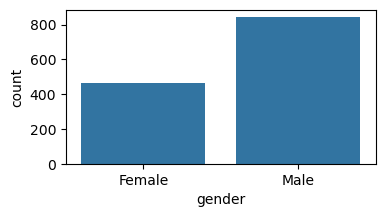

In [ ]:
plt.figure(figsize=(4,2))
sns.countplot(df,x='gender')
plt.show()


2. plot the female and male count in each pclass

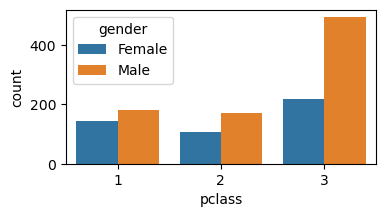

In [ ]:
plt.figure(figsize=(4,2))
sns.countplot(df,x='pclass',hue='gender')
plt.show()


2. plot the female and male count in each survival_status

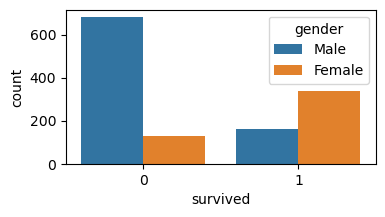

In [ ]:
plt.figure(figsize=(4,2))
sns.countplot(df,x='survived',hue='gender')
plt.show()


1. plot the companion_type count

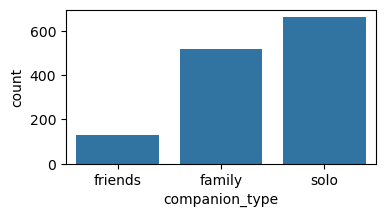

In [ ]:
plt.figure(figsize=(4,2))
sns.countplot(df,x='companion_type')
plt.show()


1. plot the companion_type count in each gender

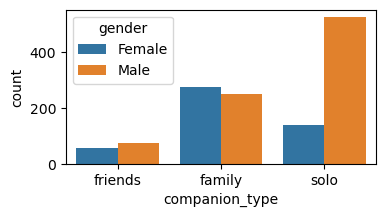

In [ ]:
plt.figure(figsize=(4,2))
sns.countplot(df,x='companion_type',hue='gender')
plt.show()


1. plot the companion_type count in each pclass

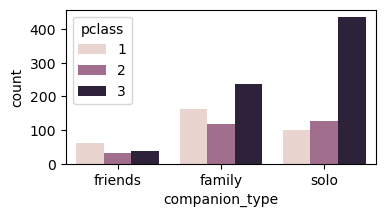

In [ ]:
plt.figure(figsize=(4,2))
sns.countplot(df,x='companion_type',hue='pclass')
plt.show()


1. plot the companion_type count in each survival_status

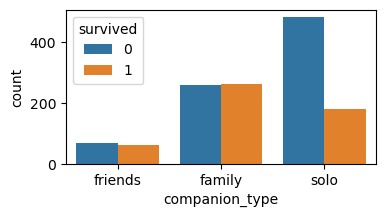

In [ ]:
plt.figure(figsize=(4,2))
sns.countplot(df,x='companion_type',hue='survived')
plt.show()


1. plot the age_category count in each gender


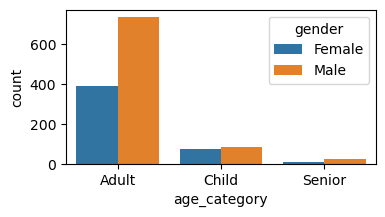

In [ ]:
plt.figure(figsize=(4,2))
sns.countplot(df,x='age_category',hue='gender')
plt.show()


1. plot the age_category count in each pclass

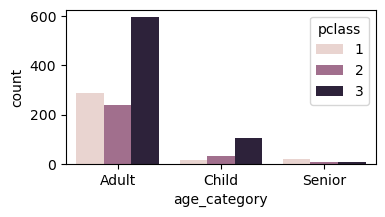

In [ ]:
plt.figure(figsize=(4,2))
sns.countplot(df,x='age_category',hue='pclass')
plt.show()


1. plot the age_category count in each survival_status


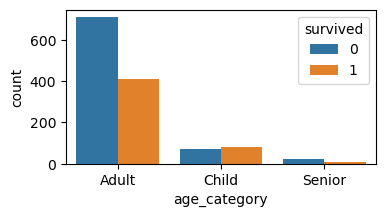

In [ ]:
plt.figure(figsize=(4,2))
sns.countplot(df,x='age_category',hue='survived')
plt.show()


1. plot the embarked count in each gender

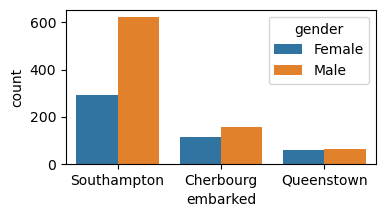

In [ ]:
plt.figure(figsize=(4,2))
sns.countplot(df,x='embarked',hue='gender')
plt.show()


1. plot the embarked count in each survival_status


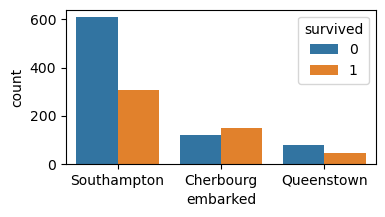

In [ ]:
plt.figure(figsize=(4,2))
sns.countplot(df,x='embarked',hue='survived')
plt.show()


1. plot the embarked count in each pclass

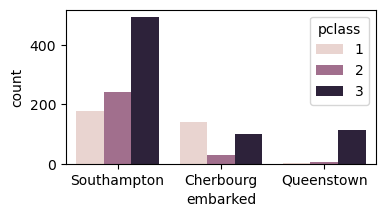

In [ ]:
plt.figure(figsize=(4,2))
sns.countplot(df,x='embarked',hue='pclass')
plt.show()


2. plot the distribution of fare

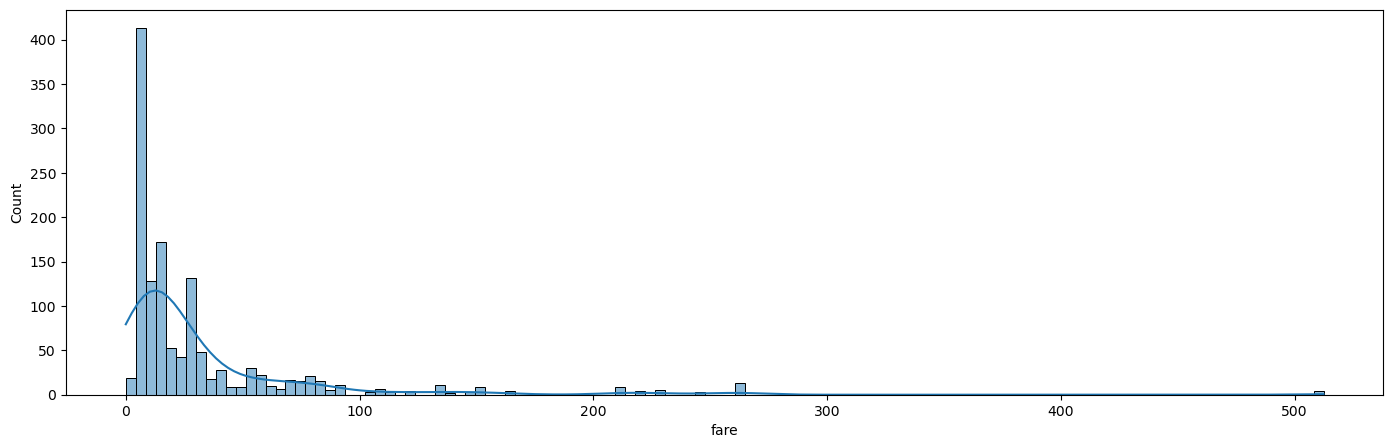

In [ ]:
plt.figure(figsize=(17,5))
sns.histplot(df,x='fare',kde=True)
plt.show()


3. plot the distribution of age

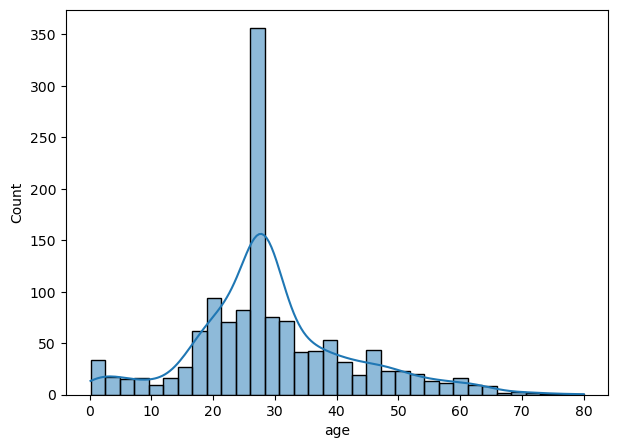

In [ ]:
plt.figure(figsize=(7,5))
sns.histplot(df,x='age',kde=True)
plt.show()


4. plot the percentage of passengers in each pclass

In [ ]:
p=df['pclass'].value_counts()
p


pclass
3    709
1    323
2    277
Name: count, dtype: int64

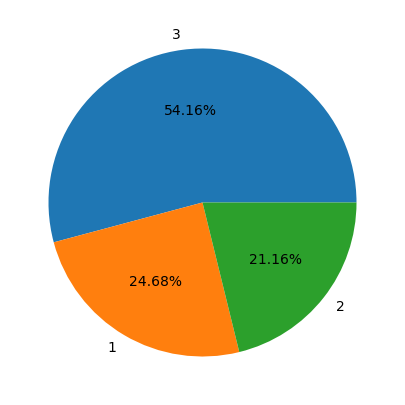

In [ ]:
plt.figure(figsize=(10,5))
plt.pie(x=p.values,labels=p.index,autopct='%.2f%%')
plt.show()


4. plot the percentage of passengers in each age_category

In [ ]:
m=df['age_category'].value_counts()


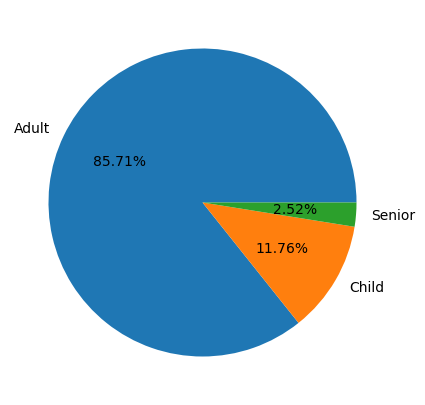

In [ ]:
plt.figure(figsize=(10,5))
plt.pie(x=m.values,labels=m.index,autopct='%.2f%%')
plt.show()


In [ ]:
#plot the spread of data in age_column wrt fare_column


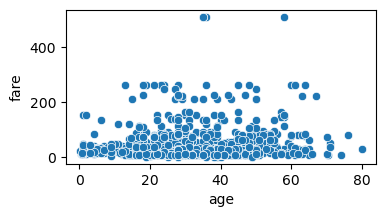

In [ ]:
plt.figure(figsize=(4,2))
sns.scatterplot(df,x='age',y='fare')
plt.show()


plot the trend of age wrt fare

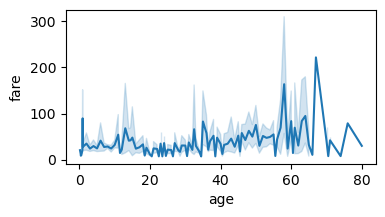

In [ ]:
plt.figure(figsize=(4,2))
sns.lineplot(df,x='age',y='fare')
plt.show()


plot the trend of fare wrt pclass

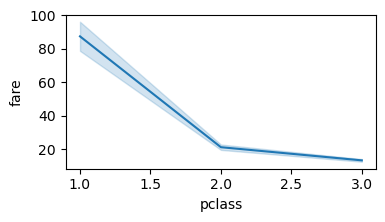

In [ ]:
plt.figure(figsize=(4,2))
sns.lineplot(df,x='pclass',y='fare')
plt.show()


find the outlier in fare,age

<Axes: xlabel='fare'>

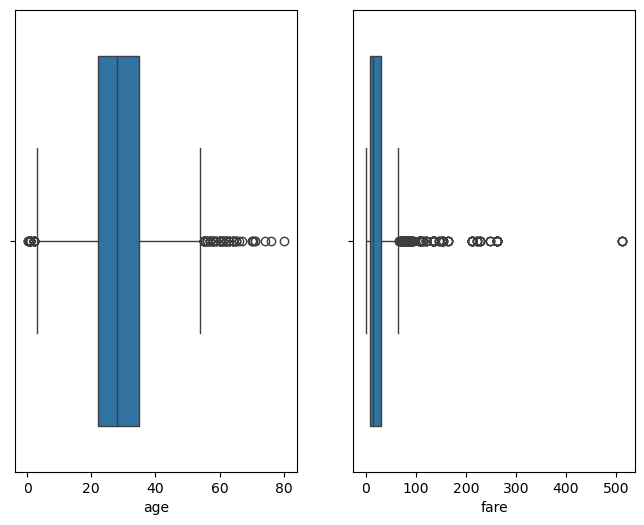

In [ ]:
fig,axes=plt.subplots(1,2,figsize=(8,6))
sns.boxplot(df,x='age',ax=axes[0])
sns.boxplot(df,x='fare',ax=axes[1])


 get the co-relation for all numerical columns using heatmap


In [ ]:
c=df.corr(numeric_only=True)


<Axes: >

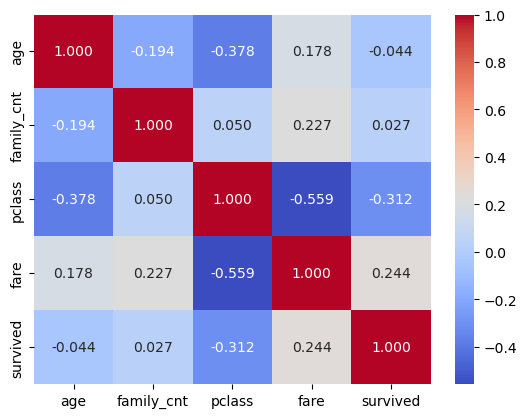

In [ ]:
sns.heatmap(c,annot=True,fmt='.3f',cmap='coolwarm') 


survival_rate of gender in each pclass

avg_age of gender in each pclass

avg_fare of gender in each pclass






<Axes: xlabel='pclass', ylabel='fare'>

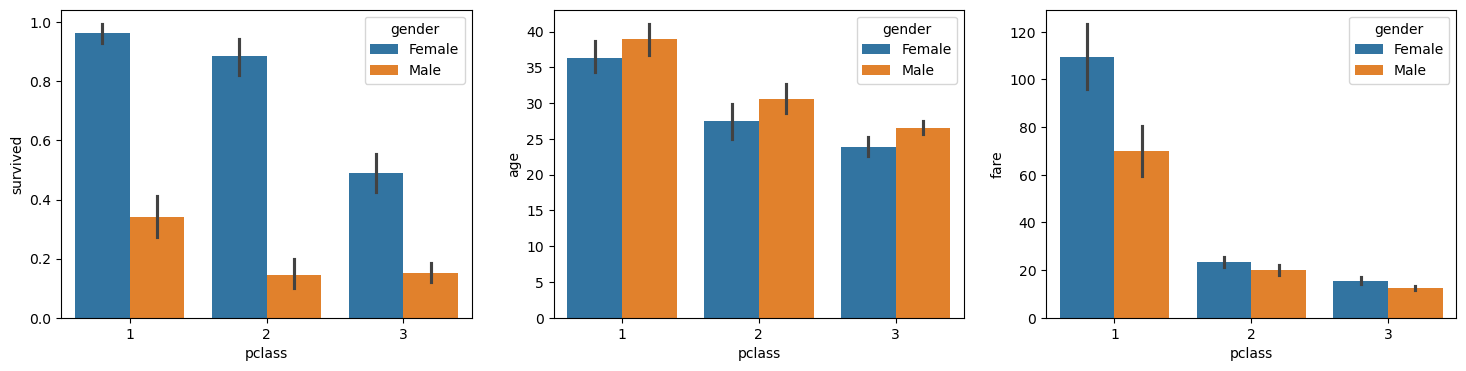

In [ ]:
fig,axes=plt.subplots(1,3,figsize=(18,4))
sns.barplot(df,x='pclass',y='survived',hue='gender',estimator='mean',ax=axes[0])
sns.barplot(df,x='pclass',y='age',hue='gender',estimator='mean',ax=axes[1])
sns.barplot(df,x='pclass',y='fare',hue='gender',estimator='mean',ax=axes[2])




survival_rate of gender in each age_category

survival_rate of companion_type in each age_category

<Axes: xlabel='age_category', ylabel='age'>

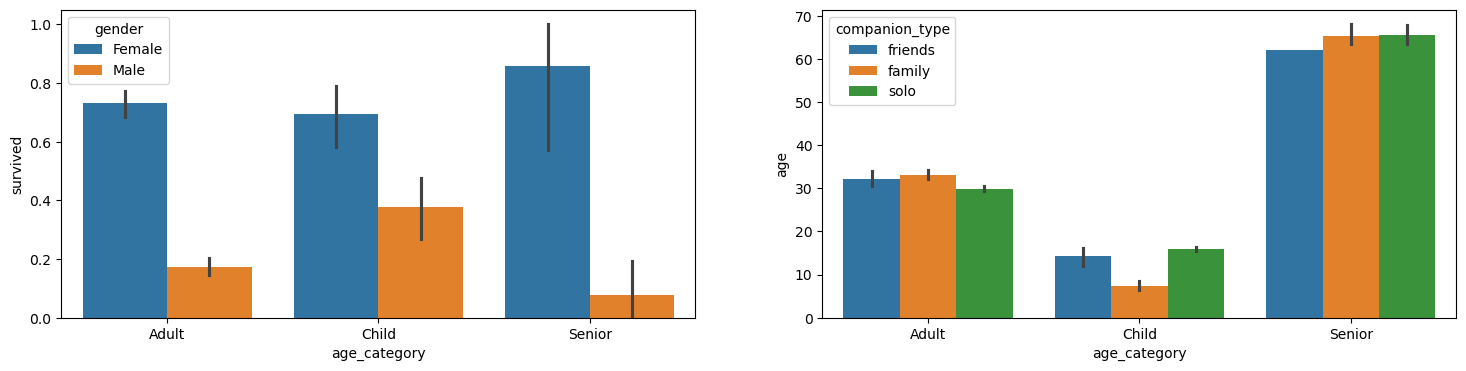

In [ ]:
fig,axes=plt.subplots(1,2,figsize=(18,4))
sns.barplot(df,x='age_category',y='survived',hue='gender',estimator='mean',ax=axes[0])
sns.barplot(df,x='age_category',y='age',hue='companion_type',estimator='mean',ax=axes[1])
